<a href="https://colab.research.google.com/github/Anchalmohadikar/wallpaper/blob/master/final_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --upgrade




In [ ]:
import opendatasets as od
import pandas as pd
od.download('stackoverflow-developer-survey-2020')


0it [00:00, ?it/s]

94609408it [00:01, 81366671.38it/s]                               
16384it [00:00, 198087.93it/s]
8192it [00:00, 97140.16it/s]

In [ ]:
survey_df= pd.read_csv('/content/stackoverflow-developer-survey-2020/survey_results_public.csv')
survey_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [ ]:
survey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [ ]:
#schema_raw_data=pd.read_csv('/content/stackoverflow-developer-survey-2020/survey_results_schema.csv')
#schema_raw_data
schema='/content/stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw=pd.read_csv(schema, index_col='Column').QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [ ]:
schema_raw['Age']

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [ ]:
selected_columns=['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',]

len(selected_columns)

25

In [ ]:
schema_df= survey_df[selected_columns].copy()
schema_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,NaN,NaN,NaN,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,Ansible;Chef,Ansible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,Senior executive/VP,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,NaN,Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...,Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,NaN,NaN,NaN,NaN,Primary/elementary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,NaN,DynamoDB;Elasticsearch;MongoDB;MySQL;PostgreSQL,Oracle,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript,HTML/CSS,Node.js,NaN


In [ ]:
#agr koi value no. ,e convert nhi hoti to use corec fn se nan set kr skte

schema_df['Age1stCode']= pd.to_numeric(schema_df.Age1stCode, errors='coerce')

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [ ]:
survey_df.describe()


,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [ ]:
schema_df.drop(schema_df[schema_df.Age<10].index, inplace=True)
schema_df.drop(schema_df[schema_df.Age>100].index, inplace=True)
#schema_df.drop(schema_df[schema_df.WorkWeekHrs>140].index, inplace=True)



In [ ]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [ ]:
schema_df.sample(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith
56607,57732,I code primarily as a hobby,Yes,32.0,20.0,NaN,NaN,NaN,Cameroon,NaN,NaN,Cassandra;Couchbase;DynamoDB;Elasticsearch;Mon...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Data or business analyst;Database administrato...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Black or of African descent,Man,NaN,NaN,NaN,Go;JavaScript;Objective-C;R;Scala;TypeScript,C#;C++;HTML/CSS;Python;SQL;VBA,.NET Core;Ansible;Apache Spark;Keras;Node.js;T...,.NET
12280,12319,I am a developer by profession,No,28.0,11.0,Yearly,64000.0,82726.0,United Kingdom,Pound sterling,GBP,DynamoDB;PostgreSQL;Redis,DynamoDB;Microsoft SQL Server;MySQL,"Developer, desktop or enterprise applications;...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;Remote work o...,Neither satisfied nor dissatisfied,I am not interested in new job opportunities,JavaScript;Python;TypeScript,C;C++;Java;JavaScript;Ruby;Scala,Apache Spark;Hadoop;Node.js,Apache Spark;Hadoop;Node.js
26244,26340,I am a developer by profession,Yes,23.0,14.0,Monthly,NaN,NaN,Lebanon,United States dollar,USD,Firebase,NaN,"Academic researcher;Developer, mobile;Develope...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Middle Eastern,Man,Flex time or a flexible schedule;Financial per...,Slightly satisfied,"I’m not actively looking, but I am open to new...",Swift,HTML/CSS;Java;Objective-C,.NET;.NET Core;Flutter;React Native;TensorFlow,NaN
17090,17150,I am a developer by profession,Yes,29.0,15.0,Monthly,90000.0,44040.0,Ukraine,Ukrainian hryvnia,UAH,NaN,NaN,"Academic researcher;Developer, embedded applic...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,"Flex time or a flexible schedule;Languages, fr...",Slightly satisfied,"I’m not actively looking, but I am open to new...",C;C++,C;C++;Java;JavaScript,NaN,NaN
4675,4691,I am a developer by profession,Yes,NaN,23.0,Yearly,70000.0,70000.0,United States,United States dollar,USD,MongoDB;MySQL;PostgreSQL;Redis,MySQL;PostgreSQL;SQLite,"Data or business analyst;Developer, back-end;D...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,"Industry that I’d be working in;Languages, fra...",Slightly satisfied,"I’m not actively looking, but I am open to new...",C;Python;Rust;SQL,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Ansible;Apache Spark;Pandas;React Native;Tenso...,Pandas
16214,16270,I am a developer by profession,Yes,28.0,12.0,Yearly,57000.0,57000.0,United States,United States dollar,USD,MongoDB,Microsoft SQL Server,Data or business analyst;Data scientist or mac...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,NaN,NaN,"Industry that I’d be working in;Languages, fra...",Slightly satisfied,I am actively looking for a job,Julia,Python;R;SQL,Apache Spark;Hadoop,Keras;Pandas;Torch/PyTorch
22064,22149,I am a developer by profession,Yes,22.0,16.0,Monthly,50000.0,3888.0,Pakistan,Pakistani rupee,PKR,Firebase;MySQL;SQLite,Firebase;MySQL;SQLite,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,East Asian;South Asian,Man,Diversity of the company or organization;Langu...,Neither satisfied nor dissatisfied,I am actively looking for a job,Dart;Java;Kotlin;PHP;Python;SQL;Swift,HTML/CSS;Java;Kotlin;PHP;SQL,Flutter;React Native;TensorFlow,NaN
18862,18935,I am a developer by profession,No,40.0,12.0,Monthly,40000.0,518868.0,France,European Euro,EUR,Microsoft SQL Server;MongoDB,Microsoft SQL Server;MySQL;SQLite,"Developer, back-end;Developer, desktop or ente...",NaN,Employed full-time,Whit

In [ ]:
survey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [ ]:
len(survey_df.columns)

61

In [ ]:
survey_df['Country'].unique

<bound method Series.unique of 0                   Germany
1            United Kingdom
2        Russian Federation
3                   Albania
4             United States
                ...        
64456         United States
64457               Morocco
64458              Viet Nam
64459                Poland
64460                 Spain
Name: Country, Length: 64461, dtype: object>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd




In [ ]:
sns.set_style('darkgrid')
survey_df.Country.nunique()


183

In [ ]:
#contries with number of response 15

top_countries= survey_df.Country.value_counts().head(15)
top_countries

United States         12469
India                  8403
United Kingdom         3896
Germany                3890
Canada                 2191
France                 1898
Brazil                 1818
Netherlands            1343
Poland                 1278
Australia              1208
Spain                  1161
Italy                  1117
Russian Federation     1092
Sweden                  886
Pakistan                809
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


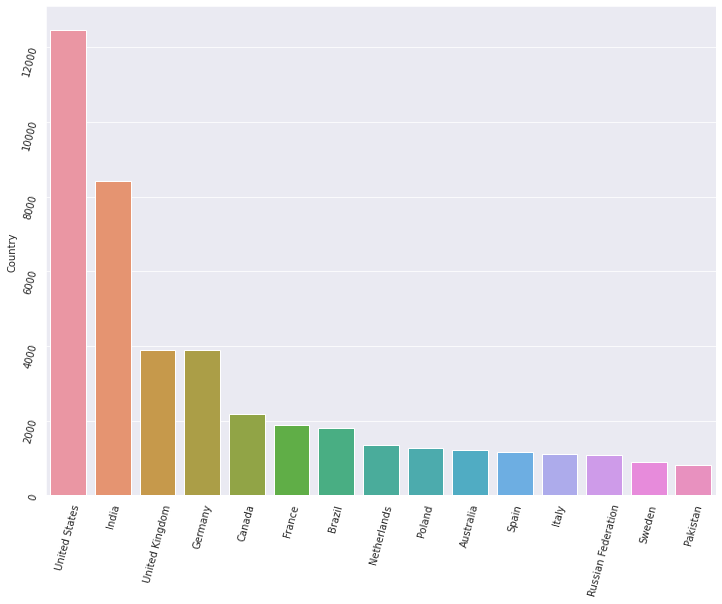

In [ ]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=75)
plt.yticks(rotation=75)
sns.barplot(top_countries.index, top_countries)


(array([  210.,  2440.,  9196., 12016.,  8781.,  5607.,  3041.,  1763.,
         1039.,   623.,   334.,   144.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 13 Patch objects>)

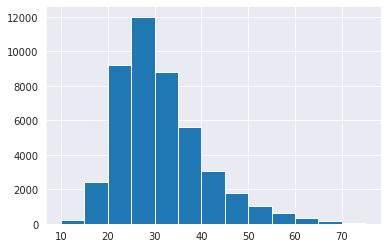

In [ ]:
plt.hist(survey_df.Age, bins=np.arange(10,80,5))

gender


In [ ]:
gender= survey_df.Gender.value_counts()
gender

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

TypeError: ignored

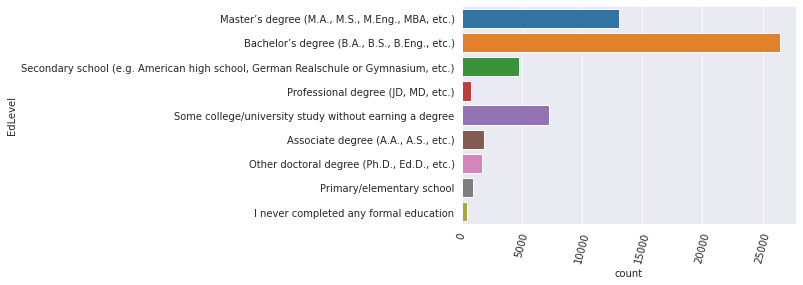

In [ ]:
# pie will be good for visualization

#Education level

sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema['EdLevel'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


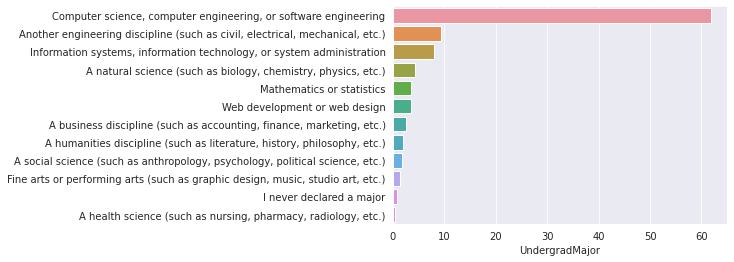

In [ ]:
undergraduate_pct= survey_df.UndergradMajor.value_counts()*100/ survey_df.UndergradMajor.count()
undergraduate_pct

sns.barplot(undergraduate_pct, undergraduate_pct.index)


**Employment**

In [ ]:
#schema_raw.Employment
survey_df.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


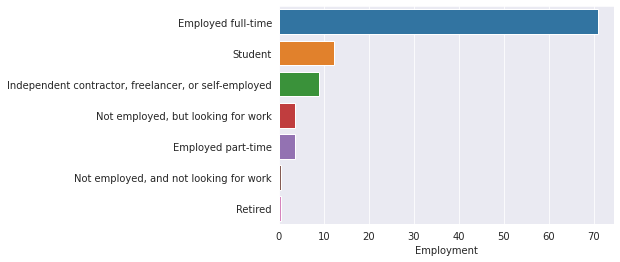

In [ ]:
survey_emp=survey_df.Employment.value_counts()*100/survey_df.Employment.count() 
survey_emp
sns.barplot(survey_emp, survey_emp.index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


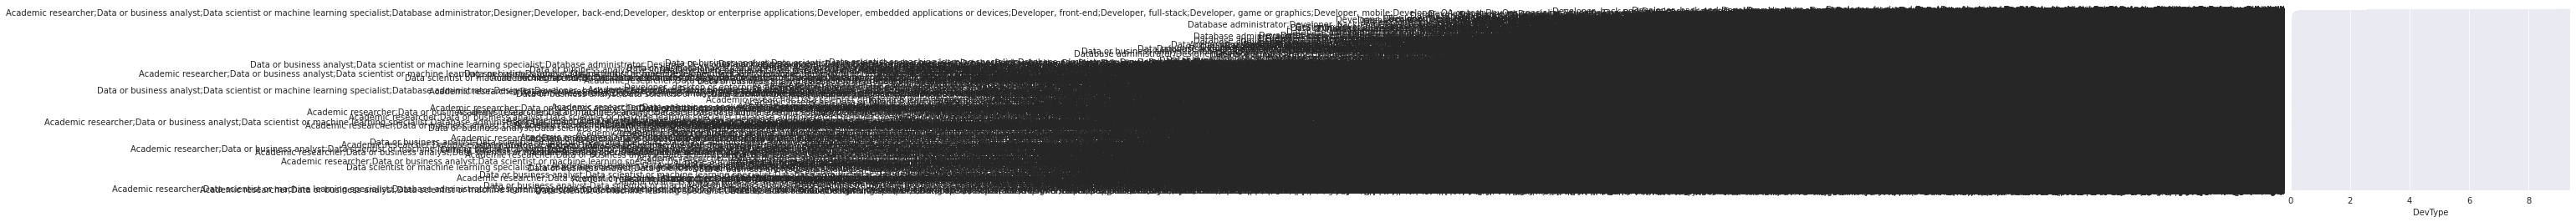

In [ ]:
survey_df.DevType.unique()
survey_df.DevType.value_counts()
devtype_pct= survey_df.DevType.value_counts()*100/survey_df.DevType.count()
devtype_pct

sns.barplot(devtype_pct, devtype_pct.index);


In [ ]:
schema_raw.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [ ]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64461, dtype: object

In [ ]:
countries_df=survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)
countries_df

,WorkWeekHrs
Country,
Angola,72.333333
Kuwait,58.222222
Norway,55.451557
United Republic of Tanzania,55.384615
Finland,52.694828
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [ ]:
#plt.xticks(rotation='75')
#sns.barplot(countries_df, countries_df.WorkWeekHrs)
survey_df.Country.value_counts()>250

United States                          True
India                                  True
United Kingdom                         True
Germany                                True
Canada                                 True
                                      ...  
Micronesia, Federated States of...    False
Marshall Islands                      False
Fiji                                  False
Chad                                  False
Lesotho                               False
Name: Country, Length: 183, dtype: bool

In [ ]:
countries_df=countries_df.loc[survey_df.Country.value_counts()>250].head(15)
countries_df

,WorkWeekHrs
Country,
Norway,55.451557
Finland,52.694828
Iran,46.012903
Israel,44.744731
Turkey,43.772026
Austria,43.176923
Viet Nam,42.371901
China,42.134752
Hungary,41.926966


In [ ]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


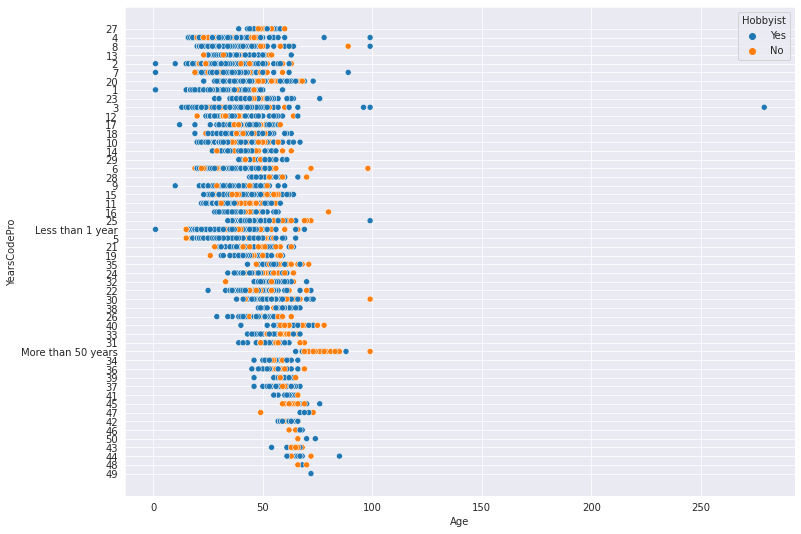

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot('Age','YearsCodePro',hue="Hobbyist", data=survey_df)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

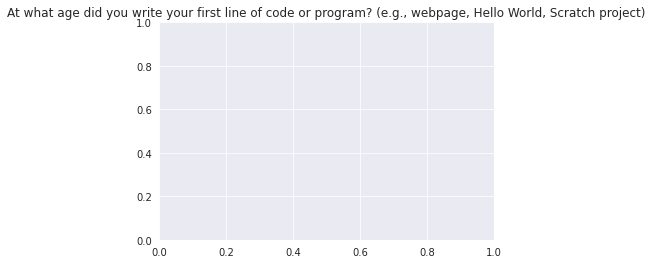

In [ ]:
plt.title(schema_raw.Age1stCode)
sns.distplot(survey_df.Age1stCode)